In [1]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import connect_to_db as cn

In [91]:
# font 설정.
plt.rcParams.update({'font.family':'Arial'})

In [33]:
# IS, ES score 별 vote distribution 가져오기.

connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

where = "is_valid=1 and is_valid_author=1 and link_key=parent_key;"

sqls.append("select score from comments where is_score = 1 and " + where)
sqls.append("select score from comments where is_score = 2 and " + where)
sqls.append("select score from comments where is_score = 3 and " + where)

sqls.append("select score from comments where es_score = 1 and " + where)
sqls.append("select score from comments where es_score = 2 and " + where)
sqls.append("select score from comments where es_score = 3 and " + where)

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['score'].tolist())))

In [34]:
# standard error와 각 score 별로 vote의 평균값 계산.
std_error_list = []
avg_list = []

for result in result_list:
    avg_list.append(np.mean(result))
    std_error_list.append(np.std(result, ddof=1) / np.sqrt(len(result)))

In [35]:
def list_chunk(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

In [36]:
# IS, ES로 두 list를 분리.
avg_list = list_chunk(avg_list, 3)
std_error_list = list_chunk(std_error_list, 3)

In [37]:
print(std_error_list)
print(avg_list)

[[0.034776664018344214, 0.041281165790592954, 0.05318215718705762], [0.039601980109463704, 0.03987142887196082, 0.052797906081424255]]
[[4.945686610859348, 4.231116131247769, 3.4947491979028094], [4.191431787333102, 4.91712355675032, 4.684271255293969]]


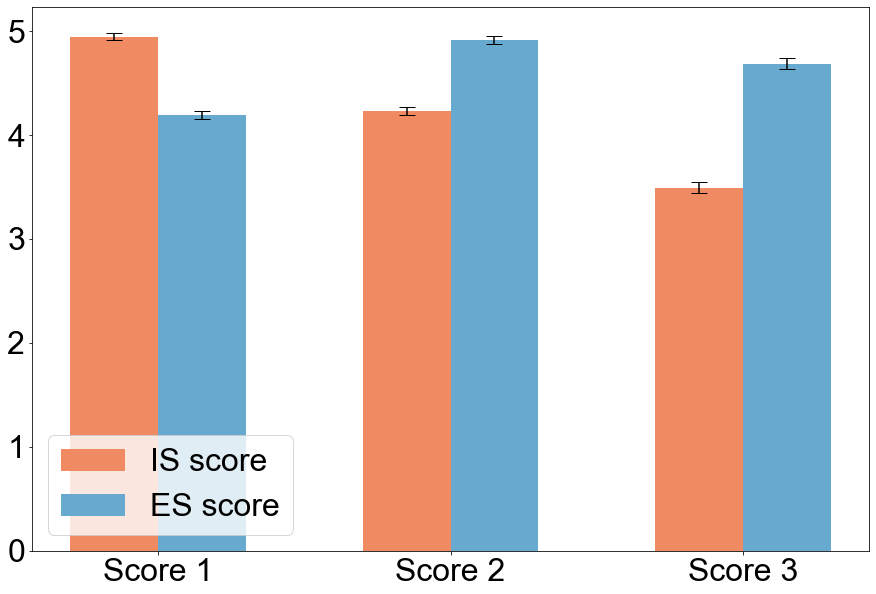

In [92]:
plt.figure(figsize=[15, 10])

IS_average = avg_list[0]
ES_average = avg_list[1]

IS_error = std_error_list[0]
ES_error = std_error_list[1]

X = np.arange(3)

plt.bar(X + 0.15, IS_average, color = '#ef8a62', width = 0.3, yerr=IS_error, capsize=8)
plt.bar(X + 0.45, ES_average, color = '#67a9cf', width = 0.3, yerr=ES_error, capsize=8)


plt.legend(['IS score', 'ES score'], fontsize=32)
plt.xticks([i + 0.3 for i in range(3)], ['Score 1', 'Score 2', 'Score 3'], fontsize=32)
plt.yticks(fontsize=32)

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


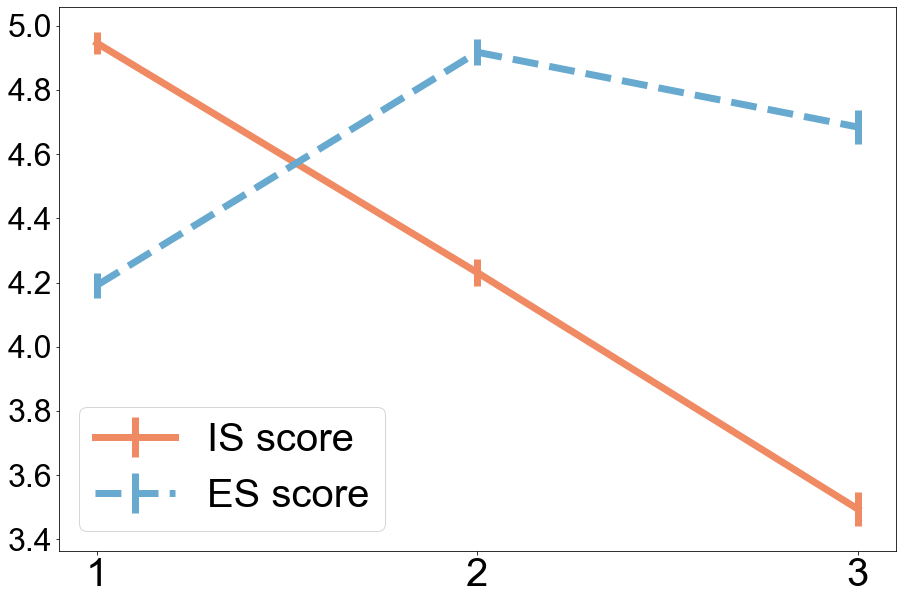

In [100]:
plt.figure(figsize=[15, 10])
plt.errorbar(x=[1,2,3], y=IS_average, yerr=IS_error, color='#ef8a62', linewidth=7, elinewidth=7)
plt.errorbar(x=[1,2,3], y=ES_average, yerr=ES_error, color='#67a9cf', linewidth=7, elinewidth=7, linestyle='--')

plt.legend(['IS score', 'ES score'], fontsize=40)
plt.xticks(np.arange(1, 4, step=1), fontsize=40)
plt.yticks(fontsize=32)

filename="error_bar_vote_score.eps"

plt.savefig(filename, format='eps')